In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from datetime import datetime

In [2]:
# Dataset loading
df1 = pd.read_csv('sample_submission.csv')

In [3]:
df1

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [4]:
df2 = pd.read_csv('store.csv')

In [5]:
df2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
df3 = pd.read_csv('train.csv')

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_11396\1670333987.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('train.csv')


In [7]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
df4 = pd.read_csv('test.csv')

In [9]:
df4

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [10]:
train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)

In [11]:
train_set, test_set

(      Store StoreType Assortment  CompetitionDistance  \
 247     248         a          c                340.0   
 394     395         a          a               3620.0   
 538     539         a          a                770.0   
 328     329         a          a               1310.0   
 1001   1002         d          c               1130.0   
 ...     ...       ...        ...                  ...   
 466     467         a          c              20390.0   
 121     122         a          c              58260.0   
 1044   1045         a          c              26990.0   
 1095   1096         a          c               1130.0   
 860     861         c          c                740.0   
 
       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 247                         9.0                    2012.0       1   
 394                         2.0                    2013.0       0   
 538                         5.0                    2013.0       1   
 328                  

In [12]:
# Distribution of promotions in both sets
train_promotions_distribution = train_set['Promo2SinceYear'].value_counts(normalize=True)
test_promotions_distribution = test_set['Promo2SinceYear'].value_counts(normalize=True)

In [13]:
train_promotions_distribution

2011.0    0.224622
2013.0    0.211663
2014.0    0.161987
2012.0    0.129590
2009.0    0.127430
2010.0    0.125270
2015.0    0.019438
Name: Promo2SinceYear, dtype: float64

In [14]:
test_promotions_distribution

2011.0    0.222222
2013.0    0.203704
2012.0    0.194444
2014.0    0.185185
2009.0    0.129630
2010.0    0.055556
2015.0    0.009259
Name: Promo2SinceYear, dtype: float64

In [15]:
# Convertion of the date column into datetime format
df3['Date'] = pd.to_datetime(df3['Date'])

In [16]:
df3['Date']

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [17]:
# Defined the holiday dates 
holiday_dates = ['2015-07-31', '2013-01-01']

In [18]:
# Defined periods before, during, and after the holidays
before_holiday_period = (df3['Date'] < pd.to_datetime(holiday_dates[0]))
during_holiday_period = ((df3['Date'] >= pd.to_datetime(holiday_dates[0])) & 
                        (df3['Date'] <= pd.to_datetime(holiday_dates[1])))
after_holiday_period = (df3['Date'] > pd.to_datetime(holiday_dates[1]))

In [19]:
before_holiday_period

0          False
1          False
2          False
3          False
4          False
           ...  
1017204     True
1017205     True
1017206     True
1017207     True
1017208     True
Name: Date, Length: 1017209, dtype: bool

In [20]:
during_holiday_period

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Name: Date, Length: 1017209, dtype: bool

In [21]:
after_holiday_period

0           True
1           True
2           True
3           True
4           True
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Name: Date, Length: 1017209, dtype: bool

In [22]:
# The average sales for each period
average_sales_before = df3[before_holiday_period]['Sales'].mean()
average_sales_during = df3[during_holiday_period]['Sales'].mean()
average_sales_after = df3[after_holiday_period]['Sales'].mean()

In [23]:
average_sales_before

5770.205198534782

In [24]:
average_sales_during

nan

In [25]:
average_sales_after

5780.053428075131

In [26]:
# The average sales behavior for each period
print("Average Sales Before Holiday:", average_sales_before)
print("Average Sales During Holiday:", average_sales_during)
print("Average Sales After Holiday:", average_sales_after)

Average Sales Before Holiday: 5770.205198534782
Average Sales During Holiday: nan
Average Sales After Holiday: 5780.053428075131


In [27]:
# Defined the seasonal periods of Christmas, Easter
christmas_period = ((df3['Date'].dt.month == 12) & 
                    (df3['Date'].dt.day >= 20) & 
                    (df3['Date'].dt.day <= 31))

easter_period = ((df3['Date'].dt.month == 4) & 
                 (df3['Date'].dt.day >= 1) & 
                 (df3['Date'].dt.day <= 15))

In [28]:
christmas_period

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Name: Date, Length: 1017209, dtype: bool

In [29]:
easter_period

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Name: Date, Length: 1017209, dtype: bool

In [30]:
# Filtered the dataset
christmas_sales = df3[christmas_period]['Sales']
easter_sales = df3[easter_period]['Sales']

In [31]:
christmas_sales

236380     2605
236381     2269
236382     3804
236383    10152
236384     1830
          ...  
623610     9028
623611    15408
623612    12174
623613    30924
623614    10614
Name: Sales, Length: 24600, dtype: int64

In [32]:
easter_sales

119305    4110
119306    7132
119307    8651
119308    9130
119309    6071
          ... 
916855       0
916856       0
916857       0
916858       0
916859       0
Name: Sales, Length: 50175, dtype: int64

In [33]:
# Sales in seasonal periods
print("Average Sales During Christmas:", christmas_sales.mean())
print("Average Sales During Easter:", easter_sales.mean())

Average Sales During Christmas: 5374.652926829268
Average Sales During Easter: 5688.68129546587


In [34]:
# correlation coefficient between sales and number of customers
correlation = df3['Sales'].corr(df3['Customers'])

In [35]:
correlation

0.894710773301837

In [36]:
print("Correlation between Sales and Number of Customers:", correlation)

Correlation between Sales and Number of Customers: 0.894710773301837


In [37]:
# Defined the promotional periods
promo_periods = df3['Promo'] == 1

In [38]:
promo_periods

0           True
1           True
2           True
3           True
4           True
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Name: Promo, Length: 1017209, dtype: bool

In [39]:
# The sales and number of customers during promotional and non-promotional periods
sales_during_promo = df3[promo_periods]['Sales'].mean()
sales_without_promo = df3[~promo_periods]['Sales'].mean()

In [40]:
sales_during_promo

7991.152045969903

In [41]:
sales_without_promo

4406.050805160786

In [42]:
customers_during_promo = df3[promo_periods]['Customers'].mean()
customers_without_promo = df3[~promo_periods]['Customers'].mean()

In [43]:
customers_during_promo

820.0988146773861

In [44]:
customers_without_promo

517.8235417537579

In [45]:
# Analyzed the impact of promotions on sales
print("Average Sales During Promotion:", sales_during_promo)
print("Average Sales Without Promotion:", sales_without_promo)

Average Sales During Promotion: 7991.152045969903
Average Sales Without Promotion: 4406.050805160786


In [46]:
# Analyzed the impact of promotions on customers
print("Average Customers During Promotion:", customers_during_promo)
print("Average Customers Without Promotion:", customers_without_promo)

Average Customers During Promotion: 820.0988146773861
Average Customers Without Promotion: 517.8235417537579


In [47]:
# The average sales for each store during promotional and non-promotional periods
store_sales_during_promo = df3[promo_periods].groupby('Store')['Sales'].mean()
store_sales_without_promo = df3[~promo_periods].groupby('Store')['Sales'].mean()

In [48]:
store_sales_during_promo

Store
1        5152.886111
2        6172.816667
3        8608.666667
4       10370.511111
5        5944.266667
            ...     
1111     6395.294444
1112    12490.363889
1113     7320.086111
1114    21601.497222
1115     7073.266667
Name: Sales, Length: 1115, dtype: float64

In [49]:
store_sales_without_promo

Store
1        3198.994845
2        2855.058419
3        3967.596220
4        6568.939863
5        2582.271478
            ...     
1111     3073.487973
1112     5975.537801
1113     4400.362543
1114    14477.742268
1115     4082.221649
Name: Sales, Length: 1115, dtype: float64

In [50]:
# The percentage increase in sales for each store during promotional periods
percentage_increase = ((store_sales_during_promo - store_sales_without_promo) / store_sales_without_promo) * 100

In [51]:
percentage_increase

Store
1        61.078287
2       116.206317
3       116.974364
4        57.871914
5       130.195265
           ...    
1111    108.079371
1112    109.024933
1113     66.351887
1114     49.204875
1115     73.270030
Name: Sales, Length: 1115, dtype: float64

In [52]:
# Identified the stores where promotions lead to a significant increase in sales
effective_stores = percentage_increase[percentage_increase > 0]

In [53]:
effective_stores

Store
1        61.078287
2       116.206317
3       116.974364
4        57.871914
5       130.195265
           ...    
1111    108.079371
1112    109.024933
1113     66.351887
1114     49.204875
1115     73.270030
Name: Sales, Length: 1114, dtype: float64

In [54]:
# Sorted the stores based on the percentage increase in sales
effective_stores = effective_stores.sort_values(ascending=False)

In [55]:
effective_stores

Store
198    225.819471
607    188.983127
543    175.906381
575    173.723366
271    162.043969
          ...    
85       6.332688
353      4.589823
676      3.692422
948      2.871735
262      2.150396
Name: Sales, Length: 1114, dtype: float64

In [56]:
print("Stores where promotions lead to a significant increase in sales:")
print(effective_stores)

Stores where promotions lead to a significant increase in sales:
Store
198    225.819471
607    188.983127
543    175.906381
575    173.723366
271    162.043969
          ...    
85       6.332688
353      4.589823
676      3.692422
948      2.871735
262      2.150396
Name: Sales, Length: 1114, dtype: float64


In [57]:
# Defined the opening and closing times of the stores
store_opening_time = '09:00:00'
store_closing_time = '18:00:00'

In [58]:
# Extracted the hour from the 'Date' column
df3['Hour'] = df3['Date'].dt.hour

In [59]:
df3['Hour']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Hour, Length: 1017209, dtype: int64

In [60]:
# Created the column to indicate if the store is open or closed
df3['Store_Status'] = ((df3['Hour'] >= int(store_opening_time[:2])) & 
                               (df3['Hour'] < int(store_closing_time[:2]))).astype(int)

In [61]:
df3['Store_Status']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Store_Status, Length: 1017209, dtype: int32

In [62]:
# Calculated the customer behavior metrics for each time interval (open/closed)
customer_behavior = df3.groupby('Store_Status')['Customers'].mean()

In [63]:
customer_behavior

Store_Status
0    633.145946
Name: Customers, dtype: float64

In [64]:
# The average number of customers during store opening and closing times
print("Average Number of Customers during Store Opening and Closing Times:")
print(customer_behavior)

Average Number of Customers during Store Opening and Closing Times:
Store_Status
0    633.145946
Name: Customers, dtype: float64


In [65]:
# Extracted the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df3['Day_of_Week'] = df3['Date'].dt.dayofweek

In [66]:
df3['Day_of_Week']

0          4
1          4
2          4
3          4
4          4
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: Day_of_Week, Length: 1017209, dtype: int64

In [67]:
# Created the column to indicate if the store is open or closed
df3['Store_Open'] = ((df3['Hour'] >= int(store_opening_time[:2])) & 
                              (df3['Hour'] < int(store_closing_time[:2])))

In [68]:
df3['Store_Open']

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Name: Store_Open, Length: 1017209, dtype: bool

In [69]:
# Grouped the store and day of the week to check if each store is open on all weekdays
stores_open_all_weekdays = df3.groupby('Store')['Store_Open'].sum() == 5  

In [70]:
stores_open_all_weekdays

Store
1       False
2       False
3       False
4       False
5       False
        ...  
1111    False
1112    False
1113    False
1114    False
1115    False
Name: Store_Open, Length: 1115, dtype: bool

In [71]:
# The correlation between sales and competitor distance
correlation = df3['Sales'].corr(df2['CompetitionDistance'])

In [72]:
correlation

0.004085248059166635

In [73]:
# Analyzed the relationship between sales and competitor distance
print("Correlation between Sales and Competition Distance:", correlation)

Correlation between Sales and Competition Distance: 0.004085248059166635


In [74]:
# The distance matters when the store and its competitors are all in city centers
if df2['CompetitionDistance'].mean() == 0:
    print("All stores and competitors are in city centers.")
    print("In this case, distance may not matter as much.")
else:
    print("Some stores or competitors are not in city centers.")
    print("Distance may still have an impact on sales.")

Some stores or competitors are not in city centers.
Distance may still have an impact on sales.


In [75]:
# Identified the stores with NA values for competitor distance
stores_with_na_distance = df2[df2['CompetitionDistance'].isna()]['Store'].unique()

In [76]:
stores_with_na_distance

array([291, 622, 879], dtype=int64)

In [77]:
# Checked the stores that have values for competitor distance
stores_with_na_distance_later = df2[(df2['Store'].isin(stores_with_na_distance)) & 
                                            (~df2['CompetitionDistance'].isna())]['Store'].unique()

In [78]:
stores_with_na_distance_later

array([], dtype=int64)

In [79]:
# Analyzed that how the opening or reopening of new competitors affects stores
if len(stores_with_na_distance_later) > 0:
    print("Stores with NA as competitor distance but later have values for competitor distance:")
    print(stores_with_na_distance_later)
else:
    print("No stores with NA as competitor distance have later values for competitor distance.")

No stores with NA as competitor distance have later values for competitor distance.


In [80]:
#Task-2: Prediction of store sales.
# Preprocessed datetime columns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [81]:
# Converted the non-numeric columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2[column] = label_encoder.fit_transform(df2[column])

In [82]:
label_encoder

LabelEncoder()

In [83]:
df2[column]

0       3
1       1
2       1
3       3
4       3
       ..
1110    1
1111    3
1112    3
1113    3
1114    2
Name: PromoInterval, Length: 1115, dtype: int32

In [84]:
imputer = SimpleImputer(strategy='mean')
df2.fillna(df2.mean(), inplace=True)

In [85]:
imputer

SimpleImputer()

In [86]:
df2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.000000,2008.000000,0,23.595447,2011.763573,3
1,2,0,0,570.0,11.000000,2007.000000,1,13.000000,2010.000000,1
2,3,0,0,14130.0,12.000000,2006.000000,1,14.000000,2011.000000,1
3,4,2,2,620.0,9.000000,2009.000000,0,23.595447,2011.763573,3
4,5,0,0,29910.0,4.000000,2015.000000,0,23.595447,2011.763573,3
...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900.0,6.000000,2014.000000,1,31.000000,2013.000000,1
1111,1112,2,2,1880.0,4.000000,2006.000000,0,23.595447,2011.763573,3
1112,1113,0,2,9260.0,7.224704,2008.668857,0,23.595447,2011.763573,3
1113,1114,0,2,870.0,7.224704,2008.668857,0,23.595447,2011.763573,3


In [87]:
X = df2.drop(columns=['CompetitionDistance'])
y = df2['CompetitionOpenSinceMonth']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [90]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Hour,Store_Status,Day_of_Week,Store_Open
0,1,5,2015-07-31,5263,555,1,1,0,1,0,0,4,False
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,4,False
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,4,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,0,4,False
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,0,0,1,False
1017205,1112,2,2013-01-01,0,0,0,0,a,1,0,0,1,False
1017206,1113,2,2013-01-01,0,0,0,0,a,1,0,0,1,False
1017207,1114,2,2013-01-01,0,0,0,0,a,1,0,0,1,False


In [91]:
# Extracted the weekdays and weekends
df3['Weekday'] = df3['Date'].dt.day_name()
df3['Is_Weekend'] = df3['Date'].dt.dayofweek // 5 

In [92]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Hour,Store_Status,Day_of_Week,Store_Open,Weekday,Is_Weekend
0,1,5,2015-07-31,5263,555,1,1,0,1,0,0,4,False,Friday,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,4,False,Friday,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,4,False,Friday,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,0,0,4,False,Friday,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,4,False,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,0,0,1,False,Tuesday,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,0,0,1,False,Tuesday,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,0,0,1,False,Tuesday,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,0,0,1,False,Tuesday,0


In [93]:
# Calculated the number of days to the nearest holiday
holidays = [datetime(2024, 4, 1), datetime(2024, 5, 1)] 
df3['Days_To_Holiday'] = df3['Date'].apply(lambda x: min([(holiday - x).days for holiday in holidays if holiday > x]))


In [94]:
df3['Days_To_Holiday']

0          3167
1          3167
2          3167
3          3167
4          3167
           ... 
1017204    4108
1017205    4108
1017206    4108
1017207    4108
1017208    4108
Name: Days_To_Holiday, Length: 1017209, dtype: int64

In [95]:
# Beginning, mid, and end of the month
df3['Month_Start'] = (df3['Date'] == df3['Date'].dt.floor('d')).astype(int)
df3['Mid_Month'] = ((df3['Date'].dt.day > 10) & (df3['Date'].dt.day < 20)).astype(int)
df3['Month_End'] = (df3['Date'] == df3['Date'].dt.floor('d') + pd.offsets.MonthEnd(0)).astype(int)

In [96]:
df3['Month_Start']

0          1
1          1
2          1
3          1
4          1
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: Month_Start, Length: 1017209, dtype: int32

In [97]:
df3['Mid_Month']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Mid_Month, Length: 1017209, dtype: int32

In [98]:
df3['Month_End']

0          1
1          1
2          1
3          1
4          1
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Month_End, Length: 1017209, dtype: int32

In [99]:
print(df3)

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  Hour  Store_Status  Day_of_Week  \
0                  0              1     0             0            4   
1  

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [102]:
numerical_columns = ['Customers', 'Sales'] 

In [103]:
numerical_columns

['Customers', 'Sales']

In [104]:
df3[numerical_columns] = scaler.fit_transform(df3[numerical_columns])

In [105]:
df3[numerical_columns]

,Customers,Sales
0,-0.168269,-0.132683
1,-0.017540,0.075373
2,0.404499,0.659800
3,1.862258,2.135414
4,-0.159656,-0.247231
...,...,...
1017204,-1.363330,-1.499723
1017205,-1.363330,-1.499723
1017206,-1.363330,-1.499723
1017207,-1.363330,-1.499723


In [106]:
print(df3)

         Store  DayOfWeek       Date     Sales  Customers  Open  Promo  \
0            1          5 2015-07-31 -0.132683  -0.168269     1      1   
1            2          5 2015-07-31  0.075373  -0.017540     1      1   
2            3          5 2015-07-31  0.659800   0.404499     1      1   
3            4          5 2015-07-31  2.135414   1.862258     1      1   
4            5          5 2015-07-31 -0.247231  -0.159656     1      1   
...        ...        ...        ...       ...        ...   ...    ...   
1017204   1111          2 2013-01-01 -1.499723  -1.363330     0      0   
1017205   1112          2 2013-01-01 -1.499723  -1.363330     0      0   
1017206   1113          2 2013-01-01 -1.499723  -1.363330     0      0   
1017207   1114          2 2013-01-01 -1.499723  -1.363330     0      0   
1017208   1115          2 2013-01-01 -1.499723  -1.363330     0      0   

        StateHoliday  SchoolHoliday  Hour  Store_Status  Day_of_Week  \
0                  0              1    

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [108]:
# Task 2.2 Building models with sklearn pipelines
data = {
    'Year': [-1.0, 0.0, 1.0],
    'Month': [-1.0, 0.0, 1.0],
    'Day': [-1.0, 0.0, 1.0],
    'Hour': [-1.0, 0.0, 1.0],
    'Minute': [-1.0, 0.0, 1.0],
    'Value': [10, 20, 30]
    }
df4 = pd.DataFrame(data)

In [109]:
df4

,Year,Month,Day,Hour,Minute,Value
0,-1.0,-1.0,-1.0,-1.0,-1.0,10
1,0.0,0.0,0.0,0.0,0.0,20
2,1.0,1.0,1.0,1.0,1.0,30


In [110]:
X = df4.drop('Value', axis=1)
y = df4['Value']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
random_forest_regressor = RandomForestRegressor(random_state=42)

In [113]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('RandomForest', random_forest_regressor)
])

In [114]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest', RandomForestRegressor(random_state=42))])

In [115]:
y_pred = pipeline.predict(X_test)

In [116]:
mse = mean_squared_error(y_test, y_pred)
print(f"RandomForestRegressor - Mean Squared Error: {mse}")

RandomForestRegressor - Mean Squared Error: 148.83999999999997


In [117]:
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.optimize import minimize
import numpy as np

In [118]:
def huber_loss(y_true, y_pred, delta=1.0):
    residual = np.abs(y_true - y_pred)
    condition = residual < delta
    squared_loss = 0.5 * (residual ** 2)
    linear_loss = delta * (residual - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss)

In [119]:
huber_scorer = make_scorer(huber_loss, greater_is_better=False)

In [120]:
random_forest_regressor = RandomForestRegressor(random_state=42)

In [121]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('RandomForest', random_forest_regressor) 
])

In [122]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest', RandomForestRegressor(random_state=42))])

In [123]:
y_pred = pipeline.predict(X_test)

In [124]:
huber_loss_value = huber_loss(y_test.values, y_pred)

In [125]:
print(f"Huber Loss: {huber_loss_value.mean()}")

Huber Loss: 11.7


In [126]:
feature_importance = pipeline.named_steps['RandomForest'].feature_importances_
feature_names = X.columns

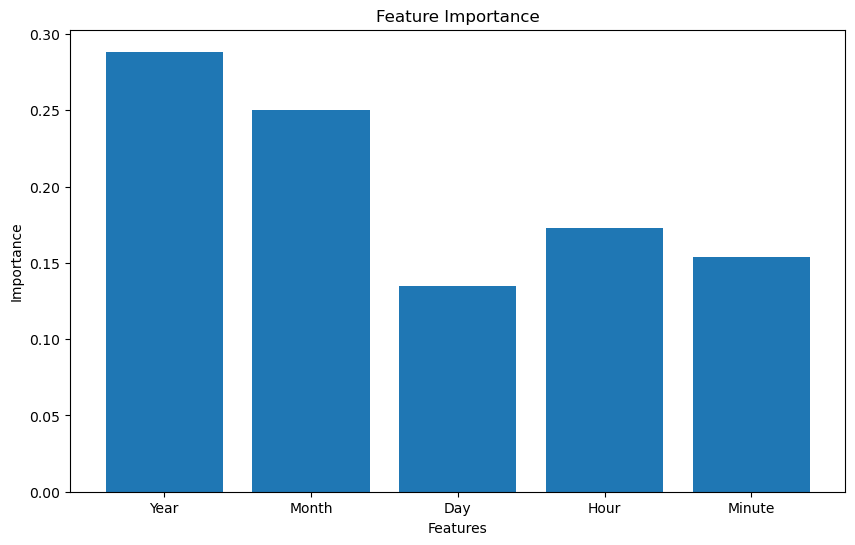

In [127]:
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [128]:
def bootstrap_confidence_interval(y_true, y_pred, n_bootstrap=1000, alpha=0.05):
    mse_scores = []
    for _ in range(n_bootstrap):
        indices = np.random.randint(0, len(y_true), len(y_true))
        mse = mean_squared_error(y_true.iloc[indices], y_pred[indices])
        mse_scores.append(mse)

In [129]:
import pickle
from datetime import datetime

In [130]:
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')[:-3]

In [131]:
model_filename = f"model_{timestamp}.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(pipeline, file)

In [132]:
print(f"Trained model has been serialized and saved as {model_filename}")

Trained model has been serialized and saved as model_11-04-2024-20-07-48-205.pkl


In [133]:
df3 = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Sales': np.random.randint(100, 1000, size=100)
}
df = pd.DataFrame(df3)

In [134]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [137]:
df3

{'Date': DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
                '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
                '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
                '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
                '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
                '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
                '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
                '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
                '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
                '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
                '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
                '2020-02-22', '2020-02-23', '2020-02-24'

In [138]:
df['Date'] = pd.to_datetime(df3['Date'])
df.set_index('Date', inplace=True)

In [139]:
# Using Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
check_stationarity(df['Sales'])

ADF Statistic: -9.796632007489894
p-value: 6.149611837368594e-17
Critical Values:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097


In [140]:
df['Sales_diff'] = df['Sales'] - df['Sales'].shift(1)
df.dropna(inplace=True)

In [141]:
# Checked autocorrelation and partial autocorrelation
lag_acf = acf(df['Sales_diff'], nlags=20)
lag_pacf = pacf(df['Sales_diff'], nlags=20, method='ols')

In [142]:
lag_acf

array([ 1.00000000e+00, -4.62858961e-01,  2.70759921e-02, -6.38357289e-02,
       -3.15187127e-02, -7.04473903e-02,  6.68972810e-02,  1.66400140e-01,
       -1.47253627e-01,  1.52999827e-01, -1.36916275e-01, -8.11385963e-02,
        2.32871133e-02,  4.51946648e-02, -3.92057459e-04,  1.83530165e-02,
        1.46981127e-01, -2.13965807e-01,  8.63711428e-02, -1.55709230e-01,
        1.71857040e-01])

In [143]:
lag_pacf

array([ 1.        , -0.47114939, -0.26238163, -0.24227135, -0.2423921 ,
       -0.36636528, -0.38661962, -0.05107813, -0.14103057,  0.08830808,
        0.0812147 , -0.05968869, -0.10762465, -0.11320445, -0.19385364,
       -0.3027257 ,  0.01447515, -0.04233535,  0.0632292 , -0.26981418,
       -0.01934087])

Text(0.5, 1.0, 'Autocorrelation Function')

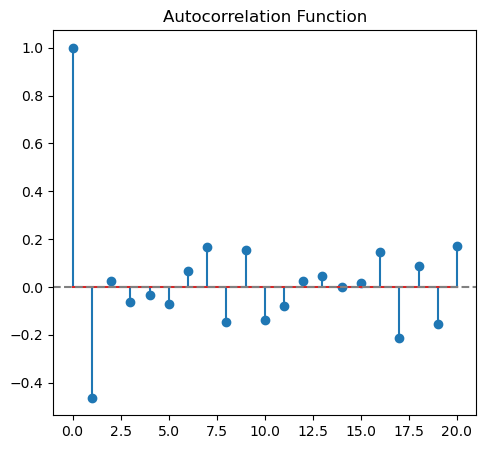

In [144]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Autocorrelation Function')

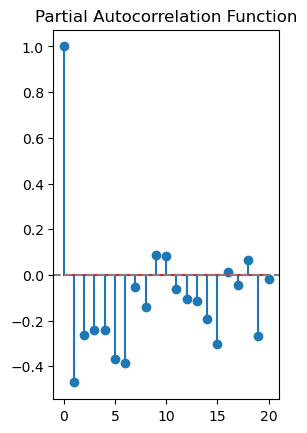

In [145]:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [146]:
# Transformed time series data into supervised learning data
def create_supervised_data(df3, lag=1):
    df = pd.DataFrame(df3)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [147]:
lag = 3 
supervised_df = create_supervised_data(df['Sales_diff'], lag)
supervised_df.columns = [f't-{lag-i}' for i in range(lag)] + ['t']
print(supervised_df.head())

              t-3    t-2    t-1      t
Date                                  
2020-01-02    0.0    0.0    0.0    2.0
2020-01-03    2.0    0.0    0.0 -176.0
2020-01-04 -176.0    2.0    0.0  300.0
2020-01-05  300.0 -176.0    2.0  229.0
2020-01-06  229.0  300.0 -176.0  284.0


In [148]:
# Scaled the data in the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_df.values)

In [149]:
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size], scaled_data[train_size:]

In [150]:
# Prepared data for LSTM model
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [151]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [152]:
# Builded the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [153]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50

8/8 [==============================] - 3s 7ms/step - loss: 0.2008
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.1954
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.1907
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1862
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1828
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.1789
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1755
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.1723
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1697
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 0.1667
Epoch 11/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1644
Epoch 12/50
8/8 [==============================] - 0s 4ms/step - loss: 0.1618
Epoch 13/50
8/8 [==============================] - 0s 4ms/step - loss: 0

In [154]:
# predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 30ms/step


In [155]:
# Calculated RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.3664801591174278
Test RMSE: 0.42040182183612307


In [156]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [157]:
import mlflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [158]:
df3 = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Sales': np.random.randint(100, 1000, size=100)
}
df = pd.DataFrame(df3)

In [159]:
df3

{'Date': DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
                '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
                '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
                '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
                '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
                '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
                '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
                '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
                '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
                '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
                '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
                '2020-02-22', '2020-02-23', '2020-02-24'

In [160]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [161]:
df['Sales_diff'] = df['Sales'] - df['Sales'].shift(1)
df.dropna(inplace=True)

In [162]:
# Transformed time series data into supervised learning data
def create_supervised_data(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [163]:
lag = 3 
supervised_df = create_supervised_data(df['Sales_diff'], lag)
supervised_df.columns = [f't-{lag-i}' for i in range(lag)] + ['t']

In [164]:
# Scaled the data in the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_df.values)

In [165]:
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size], scaled_data[train_size:]

In [166]:
# Prepared the data for LSTM model
X_test, y_test = test[:, :-1], test[:, -1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [167]:
# predictions
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [168]:
# Inverse transform predictions
y_pred = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], X_test.shape[2]), y_pred.reshape(y_pred.shape[0], 1)), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], X_test.shape[2]), y_test.reshape(y_test.shape[0], 1)), axis=1))[:, -1]

In [169]:
# Calculated RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')

Test RMSE: 421.33992552175766


In [170]:
from flask import Flask, render_template, request, send_from_directory
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os

In [171]:
app = Flask(__name__)

In [194]:
# save model
model.save('Model.h5')
print('Model Saved!')

Model Saved!


C:\Users\Rakesh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [195]:
# load model
savedModel=load_model('Model.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10851 (42.39 KB)
Trainable params: 10851 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [196]:
scaler = MinMaxScaler(feature_range=(-1, 1))